In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/airline_passenger_satisfaction.csv", sep = ",")


In [ ]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
columnas_relevantes = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
                       'Check-in Service', 'Online Boarding', 'Gate Location',
                       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
                       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
                       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

respuestas_faltantes = df[columnas_relevantes].isna().sum()
print(respuestas_faltantes)


Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                              0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

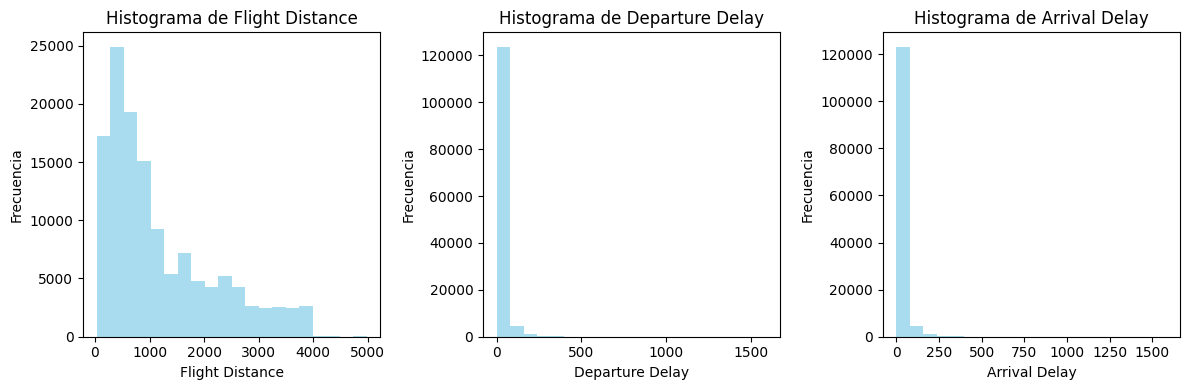

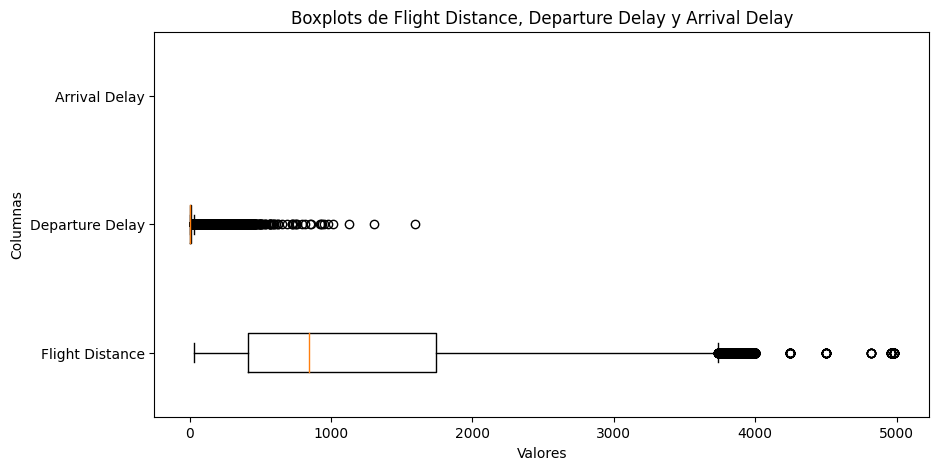

Estadísticas Descriptivas:
       Flight Distance  Departure Delay  Arrival Delay
count    129880.000000    129880.000000  129487.000000
mean       1190.316392        14.713713      15.091129
std         997.452477        38.071126      38.465650
min          31.000000         0.000000       0.000000
25%         414.000000         0.000000       0.000000
50%         844.000000         0.000000       0.000000
75%        1744.000000        12.000000      13.000000
max        4983.000000      1592.000000    1584.000000


In [ ]:
# Seleccionamos las columnas de interés
columnas_interes = ['Flight Distance', 'Departure Delay', 'Arrival Delay']

# Calculamos estadísticas descriptivas básicas
estadisticas_descriptivas = df[columnas_interes].describe()

# Creamos histogramas
plt.figure(figsize=(12, 4))
for i, columna in enumerate(columnas_interes):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[columna], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Creamos boxplots
plt.figure(figsize=(10, 5))
plt.boxplot([df[columna] for columna in columnas_interes], labels=columnas_interes, vert=False)
plt.title('Boxplots de Flight Distance, Departure Delay y Arrival Delay')
plt.xlabel('Valores')
plt.ylabel('Columnas')
plt.show()

print("Estadísticas Descriptivas:")
print(estadisticas_descriptivas)

Podemos observar una distancia significativa entre la media y los valores minimos y maximos del parametro Flight Distance. En virtud de los anterior, realizaremos un clasificacion de vuelos de corta, mediana y larga distancia. Para hacerlo utilizaremos la medida de la mediana.


In [ ]:
# Paso 1: Calculamos la Mediana de las Distancias
mediana_distancia = df['Flight Distance'].median()

In [ ]:
mediana_distancia

844.0

In [ ]:
# Paso 2: Definimos los Criterios de Categorización
corta_distancia = mediana_distancia
media_distancia = 2 * mediana_distancia

In [ ]:
# Paso 3: Creamos una Nueva Columna de Categoría de Distancia
def categorizar_distancia(distancia):
    if distancia <= corta_distancia:
        return 'Corta'
    elif distancia <= media_distancia:
        return 'Media'
    else:
        return 'Larga'

In [ ]:
# Aplicamos la función para crear la nueva columna 'Categoria de Distancia'
df['Categoria de Distancia'] = df['Flight Distance'].apply(categorizar_distancia)

El tratamiento para la demora en la partida y la llegada de los vuelos la analizaremos creando criterios que sean "A tiempo", "Demora Esperable", "Fuera de Horario". Lo que nos permitira corregir ruidos blancos innecesarios que podrian romper nuestros analisis y identificar por caso de estudio. Para hacerlo vamos a tomar el valor de la media.

In [ ]:
# Paso 1: Definimos los criterios de categorización
umbral_demora_esperable = 15

In [ ]:
# Paso 2: Creamos las nuevas columnas de categoría de demora
df['Categoria de Demora en Partida'] = 'A tiempo'  # Inicializamos todas las filas como 'A tiempo'
df.loc[df['Departure Delay'] > 0, 'Categoria de Demora en Partida'] = 'Demora esperable'
df.loc[df['Departure Delay'] > umbral_demora_esperable, 'Categoria de Demora en Partida'] = 'Fuera de horario'

In [ ]:
df['Categoria de Demora en Llegada'] = 'A tiempo'  # Inicializamos todas las filas como 'A tiempo'
df.loc[df['Arrival Delay'] > 0, 'Categoria de Demora en Llegada'] = 'Demora esperable'
df.loc[df['Arrival Delay'] > umbral_demora_esperable, 'Categoria de Demora en Llegada'] = 'Fuera de horario'

In [ ]:
print(df[['Departure Delay', 'Categoria de Demora en Partida', 'Arrival Delay', 'Categoria de Demora en Llegada']].head())

   Departure Delay Categoria de Demora en Partida  Arrival Delay  \
0                2               Demora esperable            5.0   
1               26               Fuera de horario           39.0   
2                0                       A tiempo            0.0   
3                0                       A tiempo            0.0   
4                0                       A tiempo            1.0   

  Categoria de Demora en Llegada  
0               Demora esperable  
1               Fuera de horario  
2                       A tiempo  
3                       A tiempo  
4               Demora esperable  


Vamos a clasificar en grupos la columna Age para identificar de forma mas exacta los insight que nos pueden dejar como varia la edad en la calificación que nos dejan los pasajeros.

In [ ]:
# Definimos los límites de los grupos de edad
limites_edad = [0, 1, 11, 18, 30, 65, float('inf')]

# Etiquetamos para los grupos de edad
etiquetas_edad = ['(0 - 1)', '(2 - 11)', '(12 - 18)', '(19 - 30)', '(31 - 65)', '(+65)']

# Categorizamos la columna 'Age' en grupos de edad
df['Grupo de Edad'] = pd.cut(df['Age'], bins=limites_edad, labels=etiquetas_edad)


In [ ]:
#Análisis Descriptivo para 'Departure and Arrival Time Convenience'
atributo = 'Departure and Arrival Time Convenience'

# Calculamos estadísticas descriptivas
estadisticas = df[atributo].describe()


In [ ]:
print(estadisticas)

count    129880.000000
mean          3.057599
std           1.526741
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure and Arrival Time Convenience, dtype: float64


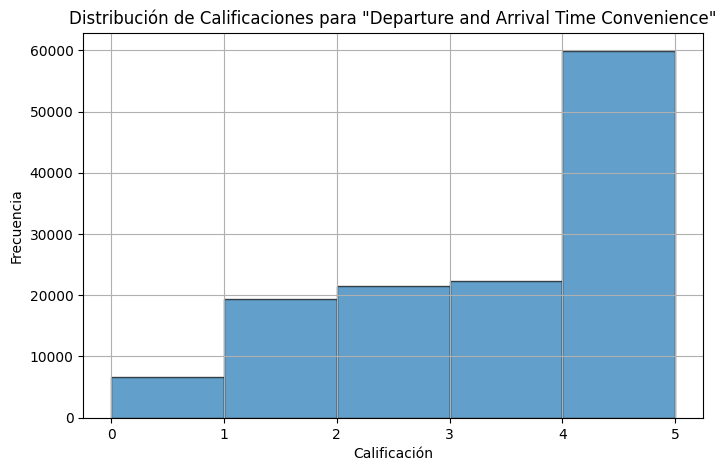

In [ ]:
# Paso 2: Visualización de Distribuciones
# Creamos un histograma para 'Departure and Arrival Time Convenience'
plt.figure(figsize=(8, 5))
plt.hist(df[atributo], bins=5, edgecolor='k', alpha=0.7)
plt.title(f'Distribución de Calificaciones para "{atributo}"')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

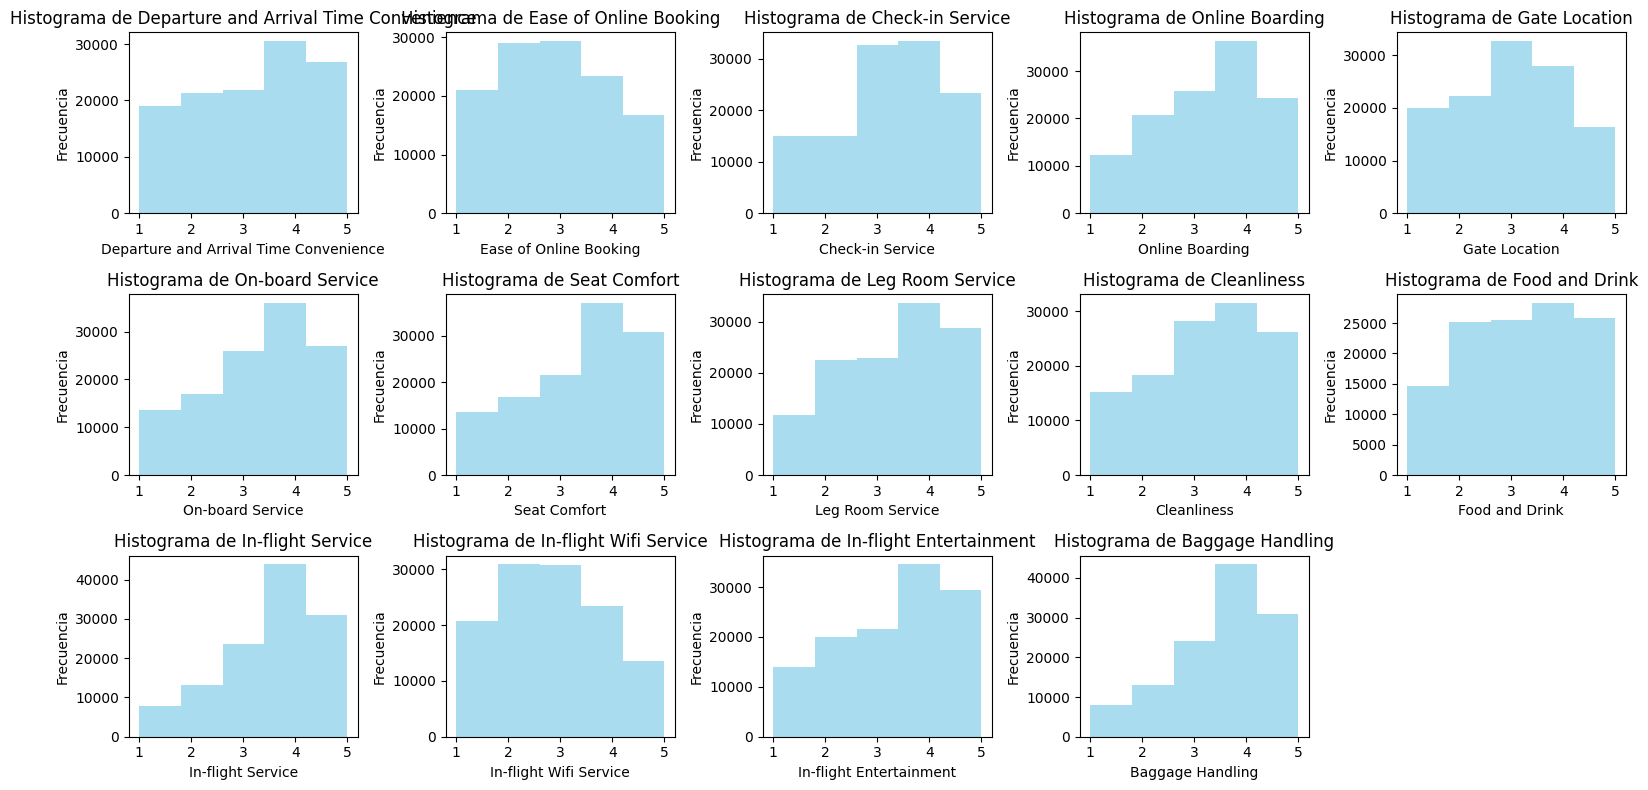

In [ ]:
# Seleccionamos las columnas de interés
columnas_interes = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

# Filtramos los registros eliminando aquellos en los que las columnas de interés tengan valor 0
df_filtered = df[(df[columnas_interes] != 0).all(axis=1)]

# Calculamos estadísticas descriptivas básicas
estadisticas_descriptivas = df_filtered[columnas_interes].describe()

# Creamos histogramas
plt.figure(figsize=(16, 8))  # Aumenta el tamaño de la figura para mostrar todos los histogramas
for i, columna in enumerate(columnas_interes):
    plt.subplot(3, 5, i + 1)  # Corrige la función subplot para mostrar los gráficos en una cuadrícula
    plt.hist(df_filtered[columna], bins=5, color='skyblue', alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
print(estadisticas_descriptivas)

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           119567.000000           119567.000000   
mean                                 3.206838                2.879172   
std                                  1.386886                1.298754   
min                                  1.000000                1.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     119567.000000    119567.000000  119567.000000     119567.000000   
mean           3.294747         3.330551       2.986961          3.386185   
std            1.266249         1.263108       1.282049          1.285412   
min            1.000000         1.

En promedio, la mayoría de los atributos tienen calificaciones superiores a 3, lo que indica una tendencia hacia calificaciones positivas en general.

La desviación estándar (std) es relativamente baja en muchos atributos, lo que sugiere que las calificaciones tienden a estar cerca de la media y no muestran una gran variabilidad.

Los valores mínimos de 0 en algunos atributos indican que existe la posibilidad de que algunos pasajeros hayan otorgado calificaciones muy bajas en esos aspectos específicos, pero estos casos parecen ser poco comunes.

El atributo con la mayor valoración promedio es "In-flight Service" (Servicio a bordo), con una puntuación promedio de aproximadamente 3.64.

Por otro lado, el atributo con la menor valoración promedio es "In-flight Wifi Service" (Servicio de Wifi a bordo), con una puntuación promedio de aproximadamente 2.81.

Estos valores reflejan la percepción de los pasajeros en cuanto a la calidad de los servicios relacionados con el vuelo. El "Servicio a bordo" tiende a recibir una valoración más alta en promedio, mientras que el "Servicio de Wifi a bordo" obtiene una valoración más baja en promedio

In [ ]:
# Mapeamos los valores de texto a valores numéricos en la columna 'Satisfaction'
df_filtered['Satisfaction'] = df_filtered['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Calculamos la correlación
correlation_matrix = df_filtered[columnas_interes].corrwith(df_filtered['Satisfaction'])



<ipython-input-23-ad899f6c0296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Satisfaction'] = df_filtered['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})


Correlación con 'Satisfaction':
Online Boarding                           0.569888
In-flight Entertainment                   0.437929
Seat Comfort                              0.374547
In-flight Wifi Service                    0.373720
On-board Service                          0.348694
Leg Room Service                          0.344028
Cleanliness                               0.330143
Baggage Handling                          0.273269
In-flight Service                         0.268224
Check-in Service                          0.245191
Ease of Online Booking                    0.227972
Food and Drink                            0.227874
Departure and Arrival Time Convenience    0.058425
Gate Location                             0.001390
dtype: float64


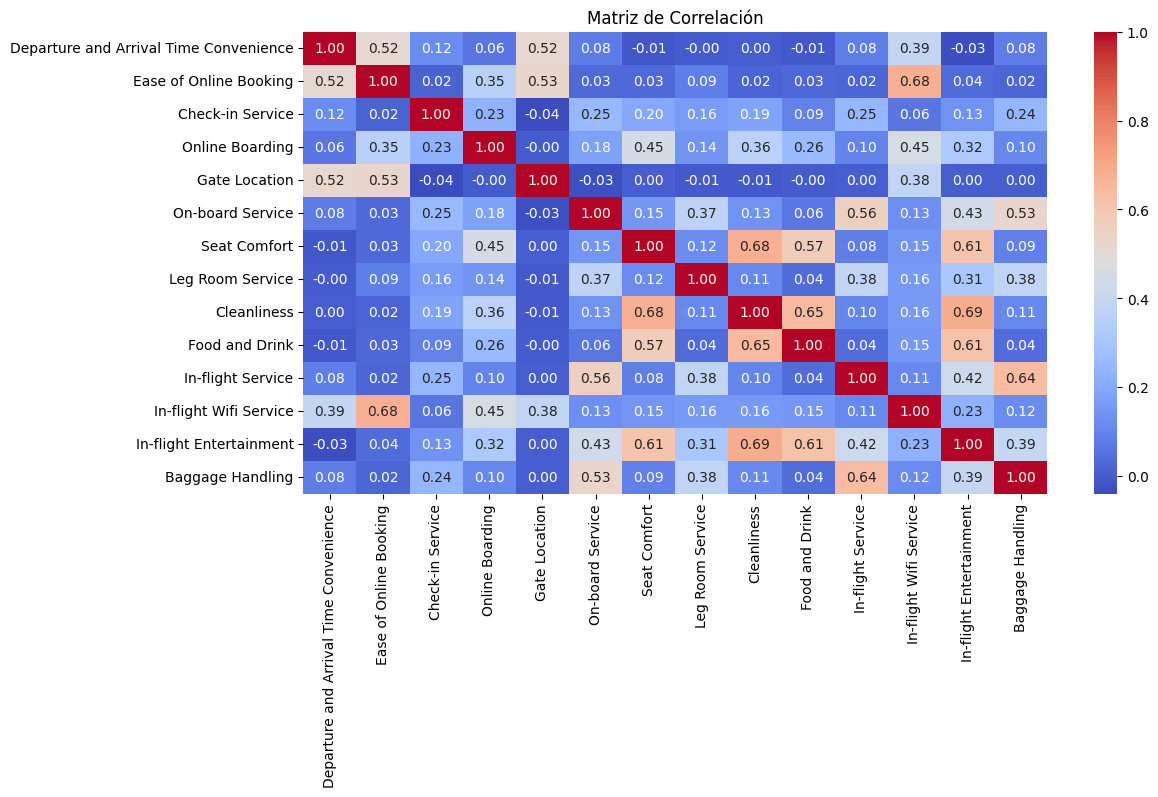

In [ ]:
# Calculamos la matriz de correlación entre los atributos y la satisfacción
correlation_matrix = df_filtered[columnas_interes].corrwith(df_filtered['Satisfaction'])

# Ordenamos los resultados por valor absoluto de correlación en orden descendente
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)

# Imprimimos la correlación de cada atributo con la satisfacción
print("Correlación con 'Satisfaction':")
print(sorted_correlation)

# Puedes visualizar la matriz de correlación si lo deseas
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtered[columnas_interes].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Los resultados de la correlación indican la fuerza y dirección de la relación entre cada atributo individual y la satisfacción del cliente. Aquí hay algunas observaciones basadas en esos resultados:

Online Boarding tiene la correlación más alta positiva con la satisfacción del cliente (0.569888). Esto sugiere que los clientes que experimentan un proceso de embarque en línea más eficiente tienden a estar más satisfechos.

In-flight Entertainment también tiene una correlación positiva significativa (0.437929). Esto implica que los clientes que disfrutan de un entretenimiento a bordo de calidad tienen una mayor probabilidad de estar satisfechos.

Seat Comfort (0.374547) y In-flight Wifi Service (0.373720) también tienen correlaciones positivas sólidas. Esto sugiere que el confort del asiento y la calidad del servicio Wi-Fi a bordo son factores que influyen positivamente en la satisfacción del cliente.

Cleanliness (0.330143) y Leg Room Service (0.344028) también tienen correlaciones positivas significativas, lo que indica que la limpieza y el espacio para las piernas son importantes para los clientes satisfechos.

Baggage Handling (0.273269) y In-flight Service (0.268224) tienen correlaciones positivas moderadas, lo que sugiere que la eficiencia en el manejo del equipaje y la calidad del servicio a bordo son factores que contribuyen a la satisfacción.

Check-in Service (0.245191), Ease of Online Booking (0.227972), y Food and Drink (0.227874) tienen correlaciones positivas más bajas en comparación con otros atributos, pero aún así, indican una influencia positiva en la satisfacción.

Departure and Arrival Time Convenience (0.058425) tiene una correlación positiva débil con la satisfacción. Esto sugiere que la conveniencia en los horarios de salida y llegada tiene menos impacto en la satisfacción en comparación con otros factores.

Gate Location (0.001390) tiene la correlación más baja y apenas influye en la satisfacción del cliente.

En resumen, los atributos que están más estrechamente relacionados con la satisfacción del cliente son el proceso de embarque en línea, el entretenimiento a bordo, la comodidad del asiento, la calidad del servicio Wi-Fi, la limpieza, el espacio para las piernas, el manejo del equipaje, el servicio a bordo, el proceso de check-in, la facilidad de reserva en línea y la calidad de la comida y bebida a bordo. Estos son los aspectos más importantes para enfocarse en la mejora de la satisfacción del cliente en la aerolínea..

In [ ]:
# Creamos un DataFrame a partir de los resultados de correlación
correlation_df = pd.DataFrame({'Variable': sorted_correlation.index, 'Correlación': sorted_correlation.values})

# Exportamos los resultados a un archivo CSV
correlation_df.to_csv('correlacion_satisfaction.csv', index=False)


In [ ]:
from google.colab import files
files.download('correlacion_satisfaction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Categoria de Distancia,Categoria de Demora en Partida,Categoria de Demora en Llegada,Grupo de Edad
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,5,3,5,5,Neutral or Dissatisfied,Corta,Demora esperable,Demora esperable,(31 - 65)
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,3,5,2,5,5,Satisfied,Corta,Fuera de horario,Fuera de horario,(31 - 65)
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,4,3,3,Satisfied,Media,A tiempo,A tiempo,(31 - 65)
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,4,5,2,5,5,Satisfied,Larga,A tiempo,A tiempo,(31 - 65)
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,3,3,3,3,Satisfied,Larga,A tiempo,Demora esperable,(31 - 65)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,4,5,4,4,4,Neutral or Dissatisfied,Corta,Demora esperable,Demora esperable,(19 - 30)
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,2,4,3,2,5,Neutral or Dissatisfied,Corta,A tiempo,A tiempo,(31 - 65)
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,4,2,3,5,Neutral or Dissatisfied,Corta,Demora esperable,Demora esperable,(31 - 65)
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,3,4,5,3,5,Satisfied,Corta,Fuera de horario,Fuera de horario,(31 - 65)


In [ ]:
# Contamos el número de pasajeros satisfechos (Satisfied)
total_pasajeros = len(df)  # Obtener el total de registros en el DataFrame
pasajeros_satisfechos = df[df['Satisfaction'] == 'Satisfied']

# Calculamos el porcentaje de pasajeros satisfechos
porcentaje_satisfechos = (len(pasajeros_satisfechos) / total_pasajeros) * 100

print(f"Porcentaje de pasajeros satisfechos: {porcentaje_satisfechos:.2f}%")


Porcentaje de pasajeros satisfechos: 43.45%


In [ ]:
# Selecciona las columnas de interés que contienen las calificaciones
columnas_calificaciones = ['Online Boarding', 'In-flight Entertainment', 'Seat Comfort', 'In-flight Wifi Service',
                            'On-board Service', 'Leg Room Service', 'Cleanliness', 'Baggage Handling',
                            'In-flight Service', 'Check-in Service', 'Ease of Online Booking', 'Food and Drink',
                            'Departure and Arrival Time Convenience', 'Gate Location']

# Calculamos el promedio de cada atributo
promedios = df_filtered[columnas_calificaciones].mean()

# Creamos un DataFrame con los nombres de atributos y sus promedios
df_promedios = pd.DataFrame({'Atributo': promedios.index, 'Promedio': promedios.values})

# Ordenamos el DataFrame por promedio en orden ascendente
df_promedios_ascendente = df_promedios.sort_values(by='Promedio', ascending=True)

# Ordenamos el DataFrame por promedio en orden descendente
df_promedios_descendente = df_promedios.sort_values(by='Promedio', ascending=False)

# Imprimimos los resultados
print("Promedios en orden ascendente:")
print(df_promedios_ascendente)

print("\nPromedios en orden descendente:")
print(df_promedios_descendente)


Promedios en orden ascendente:
                                  Atributo  Promedio
3                   In-flight Wifi Service  2.817943
10                  Ease of Online Booking  2.879172
13                           Gate Location  2.986961
12  Departure and Arrival Time Convenience  3.206838
11                          Food and Drink  3.213788
6                              Cleanliness  3.294053
9                         Check-in Service  3.294747
0                          Online Boarding  3.330551
5                         Leg Room Service  3.380381
1                  In-flight Entertainment  3.380423
4                         On-board Service  3.386185
2                             Seat Comfort  3.456221
7                         Baggage Handling  3.637333
8                        In-flight Service  3.646399

Promedios en orden descendente:
                                  Atributo  Promedio
8                        In-flight Service  3.646399
7                         Baggage H

In [ ]:
# Calculamos el porcentaje de satisfechos y no satisfechos para cada categoría de distancia
porcentaje_por_categoria_distancia = df.groupby('Categoria de Distancia')['Satisfaction'].value_counts(normalize=True) * 100

print(porcentaje_por_categoria_distancia)

Categoria de Distancia  Satisfaction           
Corta                   Neutral or Dissatisfied    66.777961
                        Satisfied                  33.222039
Larga                   Satisfied                  67.771813
                        Neutral or Dissatisfied    32.228187
Media                   Neutral or Dissatisfied    61.723415
                        Satisfied                  38.276585
Name: Satisfaction, dtype: float64


In [ ]:
# Calculamos el porcentaje de satisfechos y no satisfechos para cada categoría de distancia
porcentaje_por_categoria_class = df.groupby('Class')['Satisfaction'].value_counts(normalize=True) * 100

# Imprimimos los resultados
print(porcentaje_por_categoria_class)

Class         Satisfaction           
Business      Satisfied                  69.443372
              Neutral or Dissatisfied    30.556628
Economy       Neutral or Dissatisfied    81.232743
              Satisfied                  18.767257
Economy Plus  Neutral or Dissatisfied    75.358623
              Satisfied                  24.641377
Name: Satisfaction, dtype: float64


In [ ]:
# Calculamos el porcentaje de satisfechos y no satisfechos para cada categoría de distancia
porcentaje_por_categoria_Type_of_Travel = df.groupby('Type of Travel')['Satisfaction'].value_counts(normalize=True) * 100

# Imprimimos los resultados
print(porcentaje_por_categoria_Type_of_Travel)

Type of Travel  Satisfaction           
Business        Satisfied                  58.372448
                Neutral or Dissatisfied    41.627552
Personal        Neutral or Dissatisfied    89.867370
                Satisfied                  10.132630
Name: Satisfaction, dtype: float64


Observamos que el grado de satisfaccion de clientes que viajan por Negocios es proporcional entre Satisfactorio y Neutral o no satisfactorio. Mientras que los que viajan por motivos personales observamos que hay una mayor proporcion que no se encuentran satisfechos. Lo que podriamos analizar si es porque los que viajan por motivos personales suelen viajar en una clase economica respectoa asi viajan por negocios.

In [ ]:
# Agrupamos los datos por clase de viaje y tipo de motivo
grupo_clase_motivo = df.groupby(['Class', 'Type of Travel']).size().unstack(fill_value=0)

# Calculamos el porcentaje de pasajeros que viajan por negocios en cada clase de viaje
total_pasajeros_por_clase = grupo_clase_motivo.sum(axis=1)
porcentaje_negocios_business = (grupo_clase_motivo['Business'] / total_pasajeros_por_clase) * 100

# Imprimimos los resultados
print("Porcentaje de pasajeros que viajan por negocios en cada clase:")
print(porcentaje_negocios_business)


Porcentaje de pasajeros que viajan por negocios en cada clase:
Class
Business        95.699807
Economy         43.396388
Economy Plus    52.087982
dtype: float64


In [ ]:
# Agrupamos los datos por clase de viaje y tipo de motivo
grupo_clase_motivo = df.groupby(['Class', 'Type of Travel']).size().unstack(fill_value=0)

# Calculamos el porcentaje de pasajeros que viajan por negocios en cada clase de viaje
total_pasajeros_por_clase = grupo_clase_motivo.sum(axis=1)
porcentaje_negocios_personal = (grupo_clase_motivo['Personal'] / total_pasajeros_por_clase) * 100

# Imprimimos los resultados
print("Porcentaje de pasajeros que viajan por motivos personales en cada clase:")
print(porcentaje_negocios_personal)

Porcentaje de pasajeros que viajan por motivos personales en cada clase:
Class
Business         4.300193
Economy         56.603612
Economy Plus    47.912018
dtype: float64


In [ ]:
# Calculamos el porcentaje de cada categoría de clase en función de la edad
porcentaje_por_categoria_Type_of_travel_y_clase = df.groupby(['Type of Travel', 'Class'])['Satisfaction'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Imprimimos los resultados
print(porcentaje_por_categoria_Type_of_travel_y_clase)


Satisfaction                 Neutral or Dissatisfied  Satisfied
Type of Travel Class                                           
Business       Business                    27.962412  72.037588
               Economy                     70.052166  29.947834
               Economy Plus                60.730314  39.269686
Personal       Business                    88.290311  11.709689
               Economy                     89.804575  10.195425
               Economy Plus                91.261921   8.738079


In [ ]:
# Calculamos el porcentaje de satisfechos y no satisfechos para cada categoría de edad
porcentaje_por_categoria_edad = df.groupby(['Grupo de Edad', 'Satisfaction']).size().unstack(fill_value=0)
porcentaje_por_categoria_edad = (porcentaje_por_categoria_edad.div(porcentaje_por_categoria_edad.sum(axis=1), axis=0) * 100).round(2)

# Imprimimos los resultados
print(porcentaje_por_categoria_edad)


Satisfaction   Neutral or Dissatisfied  Satisfied
Grupo de Edad                                    
(0 - 1)                            NaN        NaN
(2 - 11)                         87.20      12.80
(12 - 18)                        79.66      20.34
(19 - 30)                        64.36      35.64
(31 - 65)                        48.88      51.12
(+65)                            81.49      18.51


In [ ]:
# Calculamos el porcentaje de cada categoría de clase en función de la edad
porcentaje_por_categoria_edad_y_clase = df.groupby(['Grupo de Edad', 'Class'])['Satisfaction'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Imprimimos los resultados
print(porcentaje_por_categoria_edad_y_clase)


Satisfaction                Neutral or Dissatisfied  Satisfied
Grupo de Edad Class                                           
(2 - 11)      Business                    69.087523  30.912477
              Economy                     89.866667  10.133333
              Economy Plus                90.928726   9.071274
(12 - 18)     Business                    52.408339  47.591661
              Economy                     86.515273  13.484727
              Economy Plus                85.064011  14.935989
(19 - 30)     Business                    39.108418  60.891582
              Economy                     82.236589  17.763411
              Economy Plus                76.003735  23.996265
(31 - 65)     Business                    26.267586  73.732414
              Economy                     78.428083  21.571917
              Economy Plus                71.604491  28.395509
(+65)         Business                    65.353160  34.646840
              Economy                     87.880731  12

In [ ]:
# Calculamos el porcentaje de cada categoría de clase en función de la edad
porcentaje_por_categoria_edad_y_frecuencia = df.groupby(['Grupo de Edad', 'Customer Type'])['Satisfaction'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Imprimimos los resultados
print(porcentaje_por_categoria_edad_y_frecuencia)


Satisfaction                 Neutral or Dissatisfied  Satisfied
Grupo de Edad Customer Type                                    
(2 - 11)      First-time                   84.000000  16.000000
              Returning                    87.605634  12.394366
(12 - 18)     First-time                   71.896420  28.103580
              Returning                    81.431301  18.568699
(19 - 30)     First-time                   69.710022  30.289978
              Returning                    60.223690  39.776310
(31 - 65)     First-time                   85.321518  14.678482
              Returning                    44.608998  55.391002
(+65)         First-time                   86.448598  13.551402
              Returning                    81.266818  18.733182


In [ ]:
# Calculamos el porcentaje de cada categoría de clase en función de la edad
porcentaje_por_Class_y_frecuencia = df.groupby(['Class', 'Customer Type'])['Satisfaction'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Imprimimos los resultados
print(porcentaje_por_Class_y_frecuencia)

Satisfaction                Neutral or Dissatisfied  Satisfied
Class        Customer Type                                    
Business     First-time                   60.329325  39.670675
             Returning                    25.364167  74.635833
Economy      First-time                   85.587502  14.412498
             Returning                    79.903749  20.096251
Economy Plus First-time                   92.021858   7.978142
             Returning                    73.564030  26.435970


En la clase "Business", los pasajeros que regresan tienen una proporción significativamente mayor de satisfacción (74.64%) en comparación con los pasajeros que viajan por primera vez (39.67%). Esto sugiere que la clase "Business" tiene un efecto positivo en la fidelización de los clientes.

En la clase "Economy", aunque los pasajeros que regresan también muestran una mayor satisfacción (20.10%) en comparación con los pasajeros que viajan por primera vez (14.41%), la diferencia no es tan pronunciada como en la clase "Business". Esto indica que la satisfacción en la clase "Economy" puede ser más uniforme entre los diferentes tipos de pasajeros.

En la clase "Economy Plus", los pasajeros que regresan muestran una mayor satisfacción (26.44%) en comparación con los pasajeros que viajan por primera vez (7.98%). Al igual que en la clase "Business", esto sugiere que la clase "Economy Plus" también tiene un efecto positivo en la fidelización de los clientes, aunque la satisfacción general en esta clase es la más baja de las tres.

In [ ]:
# Contamos cuántos clientes "Returning" hay en cada clase de viaje
clientes_returning_business = df[df['Class'] == 'Business']['Customer Type'].value_counts()['Returning']
clientes_returning_economy = df[df['Class'] == 'Economy']['Customer Type'].value_counts()['Returning']
clientes_returning_economy_plus = df[df['Class'] == 'Economy Plus']['Customer Type'].value_counts()['Returning']

# Imprimimos los resultados
print(f"Clientes 'Returning' en Business: {clientes_returning_business}")
print(f"Clientes 'Returning' en Economy: {clientes_returning_economy}")
print(f"Clientes 'Returning' en Economy Plus: {clientes_returning_economy_plus}")


Clientes 'Returning' en Business: 52929
Clientes 'Returning' en Economy: 44675
Clientes 'Returning' en Economy Plus: 8496


In [ ]:
# Calculamos el porcentaje de clientes 'Returning' en cada clase de viaje
total_registros = len(df)
porcentaje_returning_business = (clientes_returning_business / total_registros) * 100
porcentaje_returning_economy = (clientes_returning_economy / total_registros) * 100
porcentaje_returning_economy_plus = (clientes_returning_economy_plus / total_registros) * 100

# Imprimimos los resultados en porcentaje
print(f"Porcentaje de clientes 'Returning' en Business: {porcentaje_returning_business:.2f}%")
print(f"Porcentaje de clientes 'Returning' en Economy: {porcentaje_returning_economy:.2f}%")
print(f"Porcentaje de clientes 'Returning' en Economy Plus: {porcentaje_returning_economy_plus:.2f}%")


Porcentaje de clientes 'Returning' en Business: 40.75%
Porcentaje de clientes 'Returning' en Economy: 34.40%
Porcentaje de clientes 'Returning' en Economy Plus: 6.54%


Podemos observar que la mayoria de clientes que se regresan a utilizar el servicio pertenecen a la clase Business. Seguido por la Economy y por ultimo la Economy Plus.

In [ ]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Categoria de Distancia', 'Categoria de Demora en Partida',
       'Categoria de Demora en Llegada', 'Grupo de Edad'],
      dtype='object')

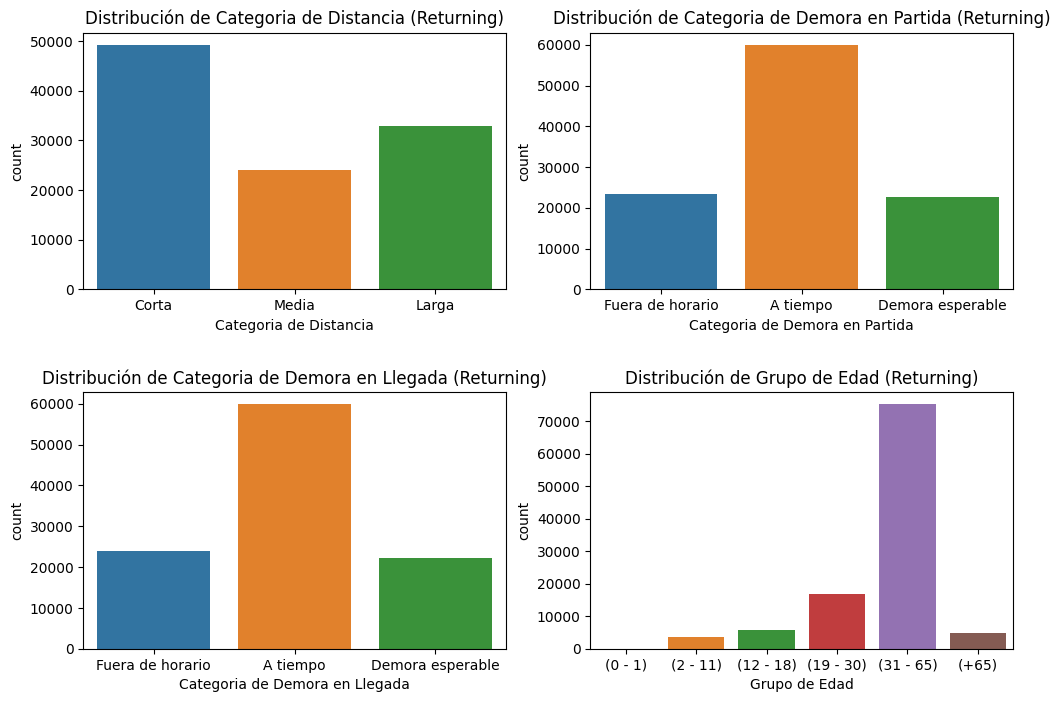

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtramos el DataFrame para incluir solo registros de "Returning".
df_returning = df[df['Customer Type'] == 'Returning']

# 2. Gráficos
# Configuramos la disposición de los subgráficos y el espacio entre ellos.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Creamos gráficos para visualizar la distribución de estas variables en función de "Returning".
sns.countplot(data=df_returning, x='Categoria de Distancia', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Categoria de Distancia (Returning)')

sns.countplot(data=df_returning, x='Categoria de Demora en Partida', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Categoria de Demora en Partida (Returning)')

sns.countplot(data=df_returning, x='Categoria de Demora en Llegada', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Categoria de Demora en Llegada (Returning)')

sns.countplot(data=df_returning, x='Grupo de Edad', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Grupo de Edad (Returning)')

# Mostramos los gráficos
plt.show()


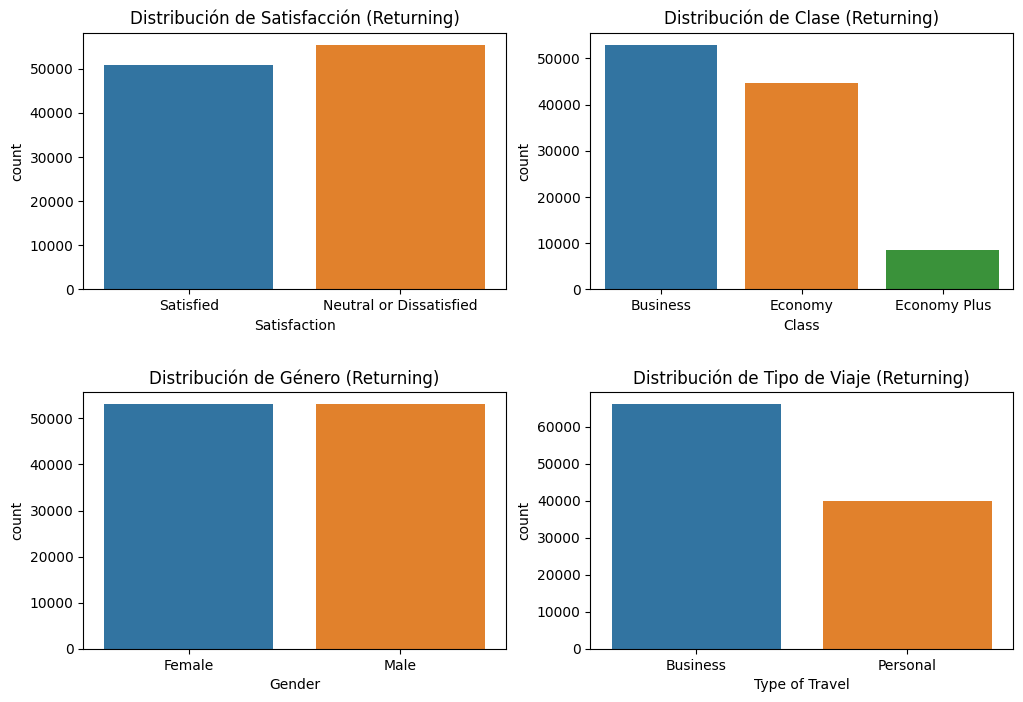

In [ ]:
# Configuramos la disposición de los subgráficos y el espacio entre ellos.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Gráfico de satisfacción general (Satisfaction)
sns.countplot(data=df_returning, x='Satisfaction', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Satisfacción (Returning)')

# Gráfico de clase (Class)
sns.countplot(data=df_returning, x='Class', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Clase (Returning)')

# Gráfico de género (Gender)
sns.countplot(data=df_returning, x='Gender', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Género (Returning)')

# Gráfico de tipo de viaje (Type of Travel)
sns.countplot(data=df_returning, x='Type of Travel', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Tipo de Viaje (Returning)')

# Mostramos los gráficos adicionales
plt.show()


Nuestro análisis revela que el perfil de nuestros pasajeros frecuentes se caracteriza por viajar en las clases Business o Economy por motivos de negocios. Observamos que no existe una diferencia significativa en cuanto al género, pero sí encontramos una tendencia al aumento en la edad de los pasajeros, especialmente entre los 30 y 65 años. Además, notamos que las distancias medias y largas suelen ser las opciones más elegidas por estos pasajeros frecuentes, y suelen experimentar una puntualidad tanto en la partida como en la llegada de los vuelos.

In [ ]:
# Agrupamos los datos por categoria de Distancia y clase
grupo_clase_distancia = df.groupby(['Class', 'Categoria de Distancia']).size().unstack(fill_value=0)

# Calculamos el porcentaje de pasajeros que viajan por negocios en cada clase de viaje
total_pasajeros_por_clase = grupo_clase_motivo.sum(axis=1)
porcentaje_ = (grupo_clase_motivo['Personal'] / total_pasajeros_por_clase) * 100

# Imprimimos los resultados
print("Porcentaje de pasajeros que viajan por motivos personales en cada clase:")
print(porcentaje_negocios_personal)

Porcentaje de pasajeros que viajan por motivos personales en cada clase:
Class
Business         4.300193
Economy         56.603612
Economy Plus    47.912018
dtype: float64


¿La distancia del vuelo afecta las preferencias de los clientes o los patrones de vuelo?

Utilizaremos gráficos de barras para visualizar cómo se distribuyen las diferentes clases en función de la distancia del vuelo.

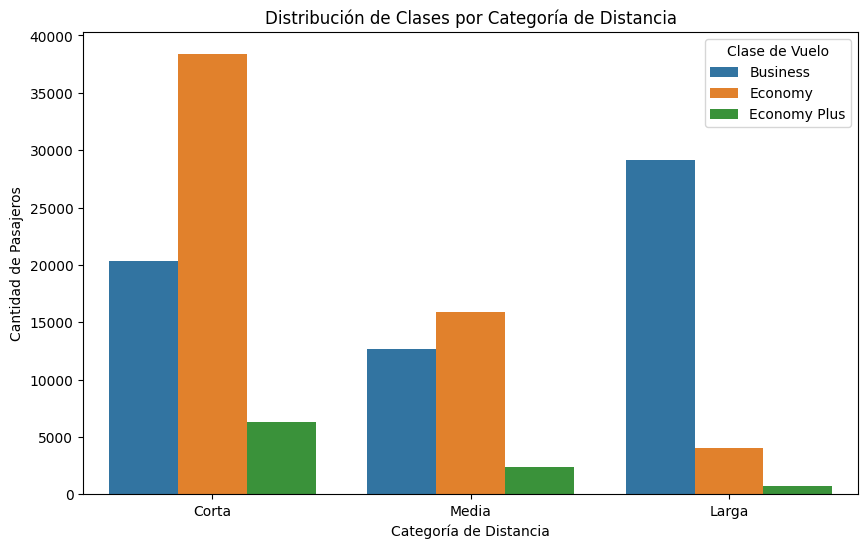

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Class']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Class')
plt.title('Distribución de Clases por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Clase de Vuelo')
plt.show()


En viajes de largas de distancias hay una preferencias por clase de servicio mas prefer por lo que se adquieren boletos clase business. Cuando la distancia se reduce observamos un crecimiento de vuelos clase Economic o Economics plus

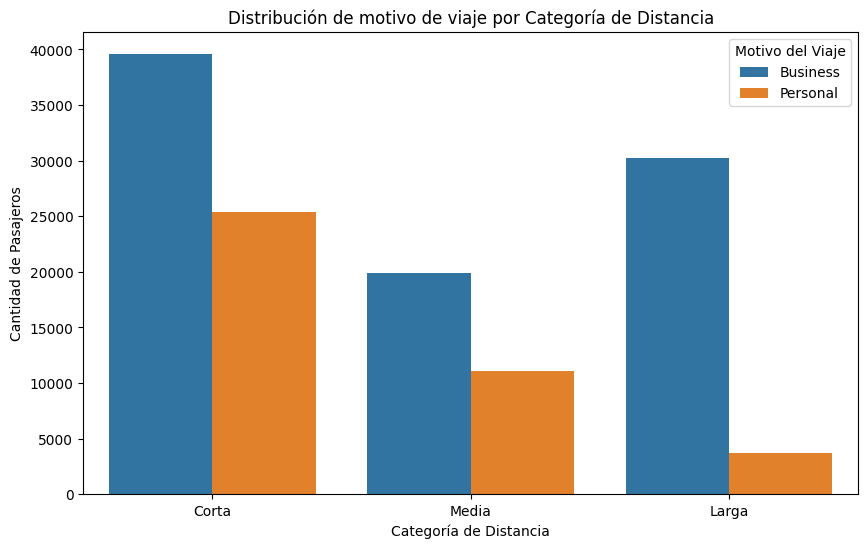

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Type of Travel']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Type of Travel')
plt.title('Distribución de motivo de viaje por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Motivo del Viaje')
plt.show()

Se observa que tanto para distancias de corta, media y larga distancia los motivos laborales son la principal razon para viajar en avión. Sin embargo observamos que tanto en los viajes de larga distancia hay una brecha mas amplia entre los motivos personales y laborales que hacen a la razon de ser del viaje.

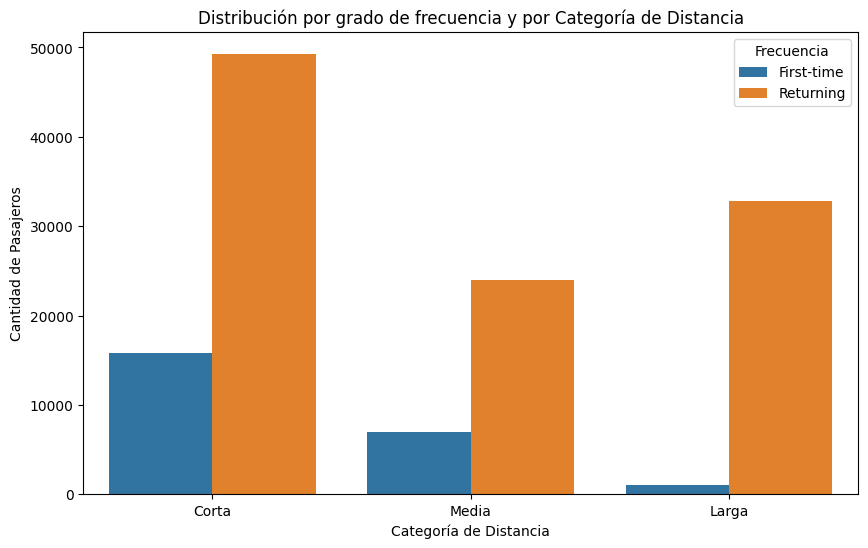

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Customer Type']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Customer Type')
plt.title('Distribución por grado de frecuencia y por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Frecuencia')
plt.show()

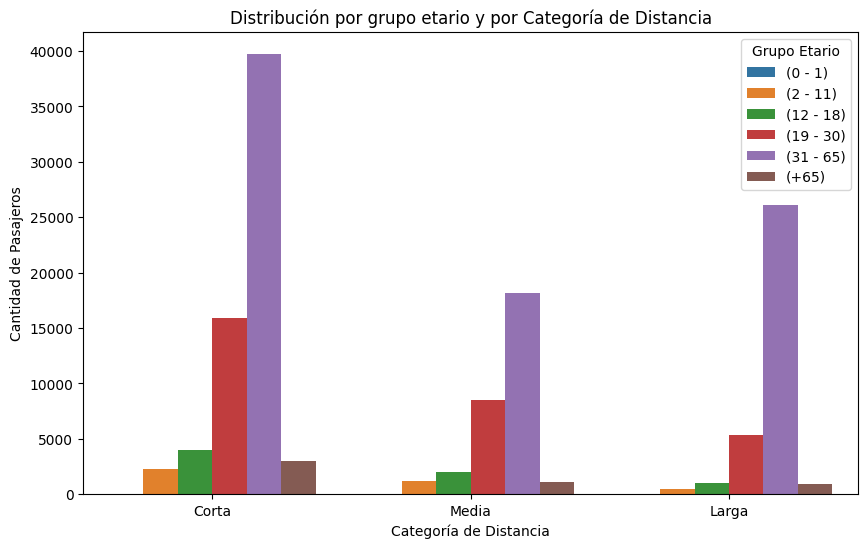

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Grupo de Edad']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Grupo de Edad')
plt.title('Distribución por grupo etario y por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Grupo Etario')
plt.show()

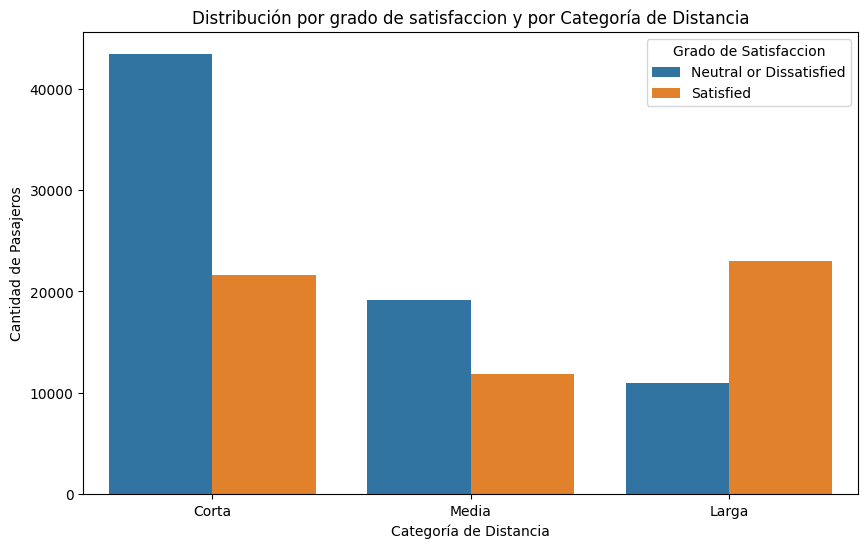

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Satisfaction']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Satisfaction')
plt.title('Distribución por grado de satisfaccion y por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Grado de Satisfaccion')
plt.show()

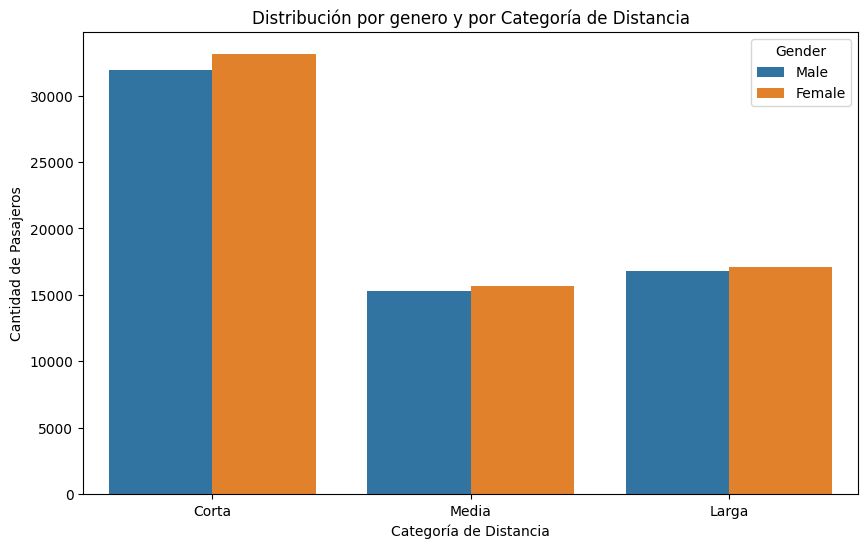

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame solo con los datos relevantes
df_subset = df[['Categoria de Distancia', 'Gender']]

# Creamos un gráfico de barras apiladas para la distribución de clases por categoría de distancia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Categoria de Distancia', hue='Gender')
plt.title('Distribución por genero y por Categoría de Distancia')
plt.xlabel('Categoría de Distancia')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Gender')
plt.show()